# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Loading Data

In [2]:
data = pd.read_csv('../input/linearregressiondataset3/linear-regression-dataset.csv')
data

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


In [3]:
data.describe()

,deneyim,maas
count,14.000000,14.000000
mean,6.250000,8778.571429
std,4.979767,5733.495185
min,0.000000,2250.000000
25%,2.250000,4125.000000
50%,5.500000,7750.000000
75%,9.500000,12000.000000
max,15.000000,20000.000000


In [4]:
data.corr()

,deneyim,maas
deneyim,1.0000,0.9887
maas,0.9887,1.0000


# Plotting Data

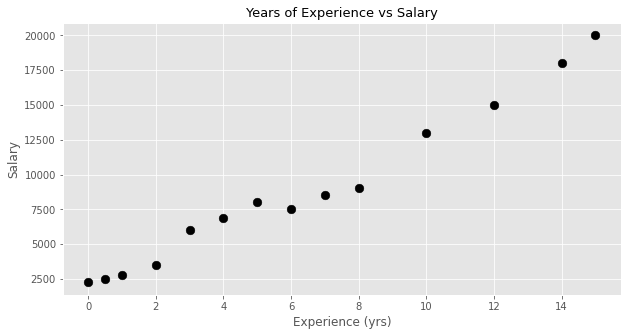

In [5]:
plt.figure(figsize=(10,5))
plt.title('Years of Experience vs Salary', fontsize=13)
plt.xlabel('Experience (yrs)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.scatter(data.deneyim, data.maas, s=75, color='black')
plt.show()

# Simple Linear Regression 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Creating Training & Testing Set

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [8]:
col = ['X_train', 'X_test', 'y_train', 'y_test']
data = [X_train, X_test, y_train, y_test]
for i in range(len(col)):
    print(f'Shape of {col[i]}: {data[i].shape}')

Shape of X_train: (12, 1)
Shape of X_test: (2, 1)
Shape of y_train: (12,)
Shape of y_test: (2,)


## Modeling & Fitting

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Coefficients: {model.coef_}')
print(f'Intercepts: {model.intercept_}')

Coefficients: [1099.50765375]
Intercepts: 1707.0181720526361


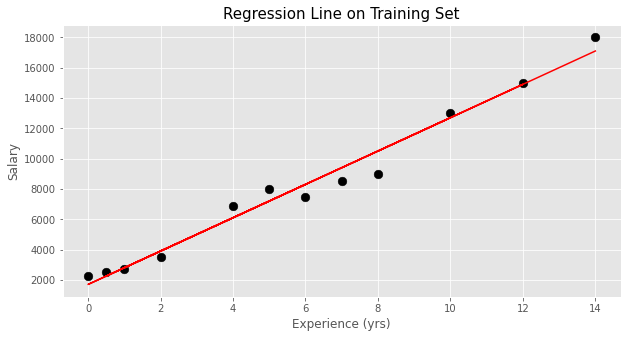

In [10]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training Set', fontsize=15)
plt.scatter(X_train, y_train, s=75, color='black')
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel('Experience (yrs)')
plt.ylabel('Salary')
plt.show()

## Making Predictions

In [11]:
y_pred = model.predict(X_test).astype(int)
pd.DataFrame({'Years Experience': X_test[:,0], 'Actual Salary': y_test, 'Predicted Salary': y_pred})

,Years Experience,Actual Salary,Predicted Salary
0,3.0,6000,5005
1,15.0,20000,18199


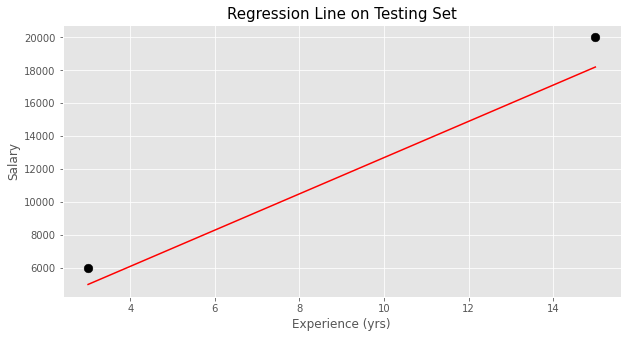

In [12]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Testing Set', fontsize=15)
plt.scatter(X_test, y_test, s=75, color='black')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Experience (yrs)')
plt.ylabel('Salary')
plt.show()

## Evaluation

In [13]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 1398.0
Residual Sum of Squares(MSE): 2116813.0
R2-Score: 0.9567997346938776


In [14]:
# Predicting salary using the model
year = 9
salary = model.predict([[year]]).astype(int)
pd.DataFrame({'Year': year, 'Salary': salary})

,Year,Salary
0,9,11602


## Thank You!